In [1]:
import pandas as pd
import os

In [6]:
scoring     = pd.read_pickle(os.path.join('..', 'all_that_pickle', 'scoring_mi.pickle'))
birth_dates = pd.read_pickle(os.path.join('..', 'all_that_pickle', 'birth_dates.pickle'))
scoring.head()

,,firstName,lastName,pos,tmID,GP,G,A,Pts,SOG
playerID,year,,,,,,,,,
abrahth01,1980,Thommy,Abrahamsson,D,HAR,32.0,6.0,11.0,17.0,66.0
actonke01,1980,Keith,Acton,C,MTL,61.0,15.0,24.0,39.0,101.0
adamsgr01,1980,Greg,Adams,L,PHI,6.0,3.0,0.0,3.0,6.0
alleyst01,1980,Steve,Alley,L,HAR,8.0,2.0,2.0,4.0,10.0
allismi01,1980,Mike,Allison,L,NYR,75.0,26.0,38.0,64.0,122.0


In [10]:
wayne = scoring.loc['gretzwa01']  # filtering only for Wayne Gretzky
sums = wayne.groupby(level=0)["G", "A"].sum()  # since we are grouping by index value (year), we use level
sums

,G,A
year,,
1980,55.0,109.0
1981,92.0,120.0
1982,71.0,125.0
1983,87.0,118.0
1984,73.0,135.0
1985,52.0,163.0
1986,62.0,121.0
1987,40.0,109.0
1988,54.0,114.0


In [12]:
means = sums.rolling(3)["G"].mean()
means.head(10)

year
1980          NaN
1981          NaN
1982    72.666667
1983    83.333333
1984    77.000000
1985    70.666667
1986    62.333333
1987    51.333333
1988    52.000000
1989    44.666667
Name: G, dtype: float64

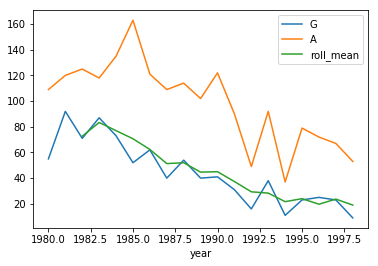

In [16]:
%matplotlib inline
sums.assign(roll_mean = means).plot();
# the roll_mean is the smooth out version of the original values 

In [17]:
# the second row is calculated using the just first two values.
# if we set min_periods=1, there will be no missing value    
means = sums.rolling(3, min_periods=2)["G"].mean()
means.head(10) 

year
1980          NaN
1981    73.500000
1982    72.666667
1983    83.333333
1984    77.000000
1985    70.666667
1986    62.333333
1987    51.333333
1988    52.000000
1989    44.666667
Name: G, dtype: float64

In [22]:
means = sums.rolling(3).mean()
means.head()

,G,A
year,,
1980,NaN,NaN
1981,NaN,NaN
1982,72.666667,118.0
1983,83.333333,121.0
1984,77.000000,126.0


In [23]:
means = sums.rolling(3, center=True).mean() # the mean of the last row is now one row up.
means.head()

,G,A
year,,
1980,NaN,NaN
1981,72.666667,118.000000
1982,83.333333,121.000000
1983,77.000000,126.000000
1984,70.666667,138.666667


In [24]:
means = sums.rolling(4, center=True).mean()  
# even window size. then the center row is assumend to be the one closer to the end of the window
means.head()

,G,A
year,,
1980,NaN,NaN
1981,NaN,NaN
1982,76.25,118.00
1983,80.75,124.50
1984,70.75,135.25


In [27]:
# win_type: type of filter that changes the importance of the values depending on their location in the window
triang_goals_sum = sums['G'].rolling(3,
                                    win_type='triang',
                                    center=True).sum()
sums.assign(triang = triang_goals_sum).head()

,G,A,triang
year,,,
1980,55.0,109.0,NaN
1981,92.0,120.0,155.0
1982,71.0,125.0,160.5
1983,87.0,118.0,159.0
1984,73.0,135.0,142.5


In [28]:
quarter_counts = birth_dates.resample('Q').count()
quarter_counts.rolling(4).sum().head(10)

birthDate
1940-03-31    NaN
1940-06-30    NaN
1940-09-30    NaN
1940-12-31    3.0
1941-03-31    1.0
1941-06-30    1.0
1941-09-30    1.0
1941-12-31    0.0
1942-03-31    1.0
1942-06-30    1.0
Freq: Q-DEC, Name: playerID, dtype: float64

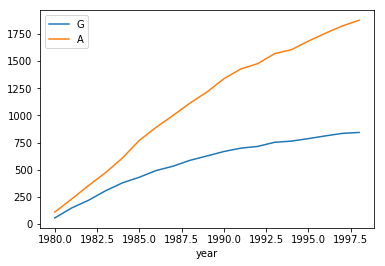

In [29]:
# Expanding windows are simpler than rolling windows as you do not specify the size as they produce values
# from the start of the column. These are useful when you'd like to see how value is changing with new observations
# coming in. Expanding methods are generic and you can pass any aggregation functions you want.
# We can do window operations on columns, by using axis= argument.

sums.expanding().sum().plot();

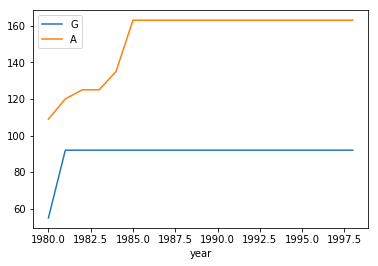

In [30]:
sums.expanding().max().plot();  # same as: sums.cummax().plot();

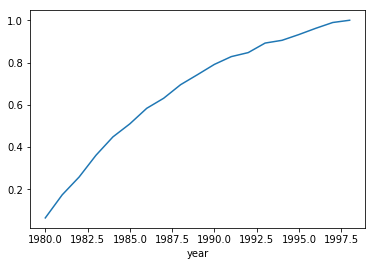

In [33]:
totals = sums.sum()
total_part = sums['G'].expanding().aggregate(lambda x:
                                               x.sum()/totals['G']) # here x argument is a series
total_part.plot();